# Linear Kater's Pendulum

First we derive an equation of motion for the pendulum:

$\sum\tau=\tau_g=-\lvert\vec{F_g}\times\vec{d}\rvert=-Mgd\sin\theta=I_0\ddot{\theta}$

Where $\tau$ is the torque, $M$ is the total mass of the pendulum, $g$ is the gravitational constant, $d$ is the distance from the centre of mass to the point about which the pendulum is rotating, $I_0$ is the moment of inertia about the point of roatation, and $\ddot{\theta}$ is the angular acceleration.

Rearranging our equation of motion we get:

$\ddot{\theta}+\frac{Mgd}{I_0}\sin\theta=0$

However, for small angles $\sin\theta=\theta$ so:

$\ddot{\theta}+\frac{Mgd}{I_0}\theta=0$

This has the solution:

$\theta=\theta_0\sin(\sqrt{\frac{Mgd}{I_0})}t$

The time period of the pendulum derived from this equation is:

$T=2\pi\sqrt{\frac{I_0}{Mgd}}$

From the parallel axis theorem, we know that the moment of inertia of an object about an axis parallel to an axis through its centre of mass is related to the moment of inertia about that centre of mass, $I_c$, by:

$I_0=I_c+MR^2$

Where R is the distance between the two axes. In this case, the axis of $I_0$ and $I_c$.

The moment of inertia about the centre of mass is the sum of the moments of inertia for the rod and disks is:

$I_c=\frac{1}{12}M_1(L^2+W^2)+M_1R_1^2+\frac{1}{2}M_2r_1^2+M_2R_2^2+\frac{1}{2}M_3r_2^2+M_3R_3^2$

Where $M_1$ is the mass of the rod, $M_2$ is the mass of the first disk, and $M_3$ is the mass of the second disk. $L$ and $W$ are the length and width of the rod and $r_1$ and $r_2$ are the radii of the two disks. Finally, $R_1$, $R_2$ and $R_3$ are the respective perpendicular distances between their centres of mass and the centre of mass of the combined object.

Substituting the equation for $I_c$ at equal time periods into the equation for either $T_1$ or $T_2$:

$T=2\pi\sqrt{\frac{l_1+l_2}{g}}=2\pi\sqrt{\frac{L}{g}}$

Where L is the distance between the two pivot points of Kater's Pendulum.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
g = 9.81 # Acceleration due to gravity

L, W = 1.5, 0.04 # Length and width of rod
r_1, r_2 = 0.095, 0.095 # Radii of the cylinders
P_1, P_2 = 0.25, 1.25 # Positions of the knife edges

m_1, x_1 = 2.62, L/2 # Mass of the rod and its centre of mass
m_2, x_2 = 0.68, 0.125 # Mass of the first disk and its centre of mass
m_3, x_3 = 1.5, np.arange(0.25, 1.26, 0.01) # Mass of the second disk and its centres of mass as it is moved

M = m_1 + m_2 + m_3 # Total mass

C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Array of the centres of mass


l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Array of the distances between the centres of mass and the knife edges

R_1 = C_of_M - x_1 # Array of the distances between the centres of mass and the centre of mass of the rod
R_2 = C_of_M - x_2 # Array of the distances between the centres of mass and the centre of mass of the first disk
R_3 = C_of_M - x_3 # Array of the distances between the centres of mass and the centre of mass of the second disk

I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

T_1 = 2 * np.pi * np.sqrt((I_c + M * l_1**2) / (M * g * l_1)) # Time periods for first position
T_2 = 2 * np.pi * np.sqrt((I_c + M * l_2**2) / (M * g * l_2)) # Time periods for second position

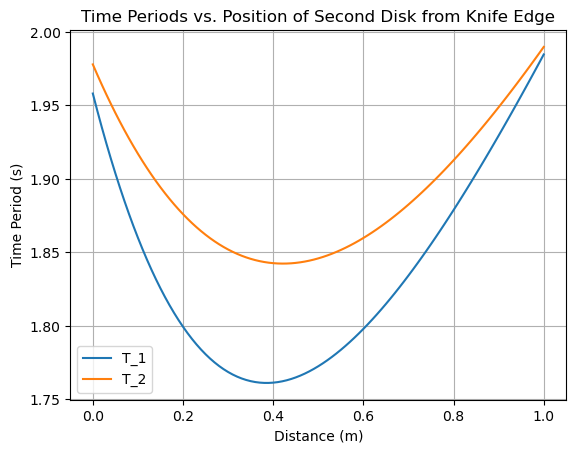

In [4]:
plt.plot(x_3 - P_1, T_1, label="T_1")
plt.plot(P_2 - x_3, T_2, label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

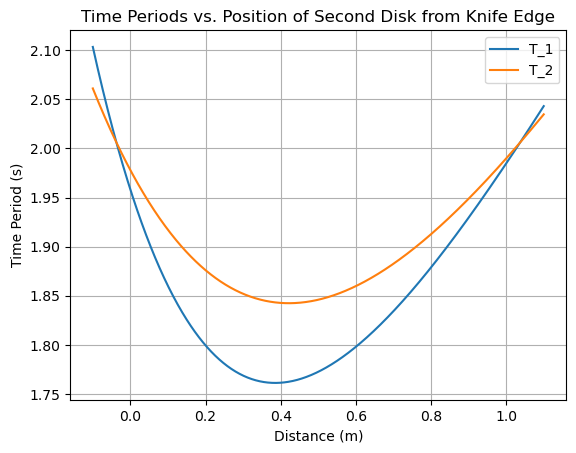

In [5]:
# Create cubic spline interpolation functions for T_1 and T_2
interp_T1 = interp1d(x_3 - P_1, T_1, kind='cubic', fill_value="extrapolate")
interp_T2 = interp1d(P_2 - x_3, T_2, kind='cubic', fill_value="extrapolate")

# Define a new range for the x-axis that extends beyond the current data points by 0.1 in both directions
extended_x = np.linspace(min(x_3 - P_1) - 0.1, max(P_2 - x_3) + 0.1, num=1000)

# Evaluate the interpolation functions at the new x values
extended_T1 = interp_T1(extended_x)
extended_T2 = interp_T2(extended_x)

# Plot the extended curves
plt.plot(extended_x, extended_T1, label="T_1")
plt.plot(extended_x, extended_T2, label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

Intersection point 1: x = 1.038, T_1 = 2.006, T_2 = 2.006
Intersection point 2: x = -0.038, T_1 = 2.006, T_2 = 2.006


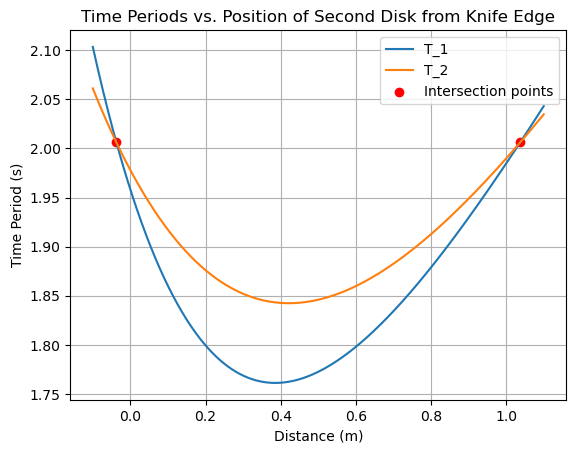

In [6]:
# Find the indices where the difference between the two curves is minimal
sorted_diff_idx = np.argsort(np.abs(extended_T1 - extended_T2))

# Get the first smallest difference index
min_diff_idx1 = sorted_diff_idx[0]

# Find the second smallest difference index with a significant x difference
min_x_diff_threshold = 0.1
min_diff_idx2 = None
for idx in sorted_diff_idx[1:]:
    if np.abs(extended_x[idx] - extended_x[min_diff_idx1]) > min_x_diff_threshold:
        min_diff_idx2 = idx
        break

# Find the corresponding x values (distances) for the two smallest difference indices
x_intersection1 = extended_x[min_diff_idx1]
x_intersection2 = extended_x[min_diff_idx2]

# Print the intersection points (x, T_1, T_2)
print(f"Intersection point 1: x = {x_intersection1:.3f}, T_1 = {extended_T1[min_diff_idx1]:.3f}, T_2 = {extended_T2[min_diff_idx1]:.3f}")
print(f"Intersection point 2: x = {x_intersection2:.3f}, T_1 = {extended_T1[min_diff_idx2]:.3f}, T_2 = {extended_T2[min_diff_idx2]:.3f}")

# Plot the intersection points on the graph
plt.plot(extended_x, extended_T1, label="T_1")
plt.plot(extended_x, extended_T2, label="T_2")
plt.scatter([x_intersection1, x_intersection2], [extended_T1[min_diff_idx1], extended_T1[min_diff_idx2]], color='red', label='Intersection points')
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()